In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [8]:
x_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')

x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [11]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test= x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


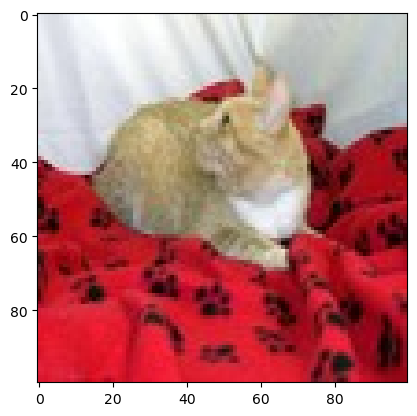

In [18]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

# Model

In [22]:
model = Sequential([
    Conv2D(32 , (3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32 , (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [23]:
# model = Sequential()

# model.add(Conv2D(32 , (3,3), activation = 'relu', input_shape=(100,100,3)))
# model.add(MaxPooling2D((2,2)))
    
# model.add(Conv2D(32 , (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))
    
# model.add(Flatten())  
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

In [27]:
model.fit(x_train,y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 11s 347ms/step - loss: 0.4538 - accuracy: 0.7900
Epoch 2/5
32/32 [==============================] - 12s 381ms/step - loss: 0.4195 - accuracy: 0.8155
Epoch 3/5
32/32 [==============================] - 12s 387ms/step - loss: 0.3625 - accuracy: 0.8360
Epoch 4/5
32/32 [==============================] - 12s 370ms/step - loss: 0.2913 - accuracy: 0.8750
Epoch 5/5
32/32 [==============================] - 13s 398ms/step - loss: 0.2344 - accuracy: 0.9175


In [28]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 49ms/step - loss: 0.7366 - accuracy: 0.6850


[0.7365727424621582, 0.6850000023841858]

# Marking Predictions

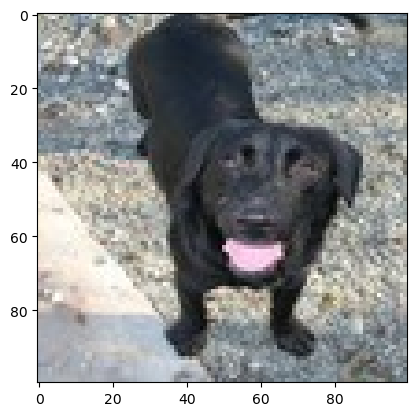

1/1 [==============================] - 0s 21ms/step
Our model says it is a Dog


In [34]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5 

if(y_pred == 0):
    pred = 'Dog'
else:
    pred = 'Cat'
    
print('Our model says it is a',pred)